# imports

In [1]:
import random
from scipy.stats import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
import random
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cosine
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
import pandas as pd

show something

<Figure size 640x480 with 0 Axes>

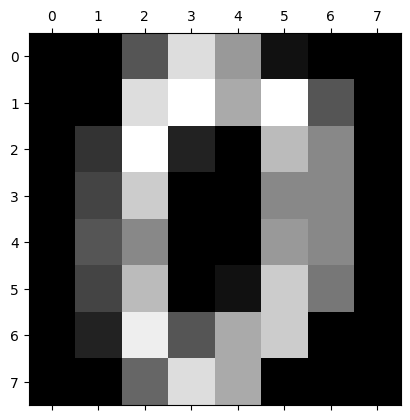

In [2]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
img = digits.images[0]
plt.show()

In [3]:
d = digits.data

In [4]:
digits.images.shape

(1797, 8, 8)

# A

shuffle

In [5]:
data_x = digits.data
data_y = digits.target

idx = np.random.permutation(len(data_x))
x, y = data_x[idx], data_y[idx]

# plot 16 random number

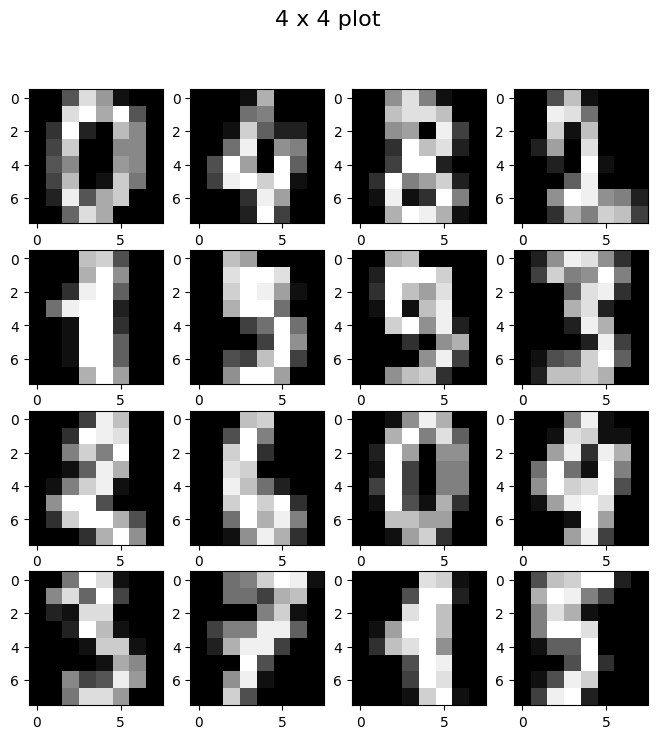

In [43]:
number_of_data = len(digits.images)

n_rows = 4
n_cols = 4

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 8) )
fig.suptitle('4 x 4 plot', fontsize=16)
for i in range(16):
    id = random.randint(0, number_of_data - 1)
    ax[i % 4, int(i / 4)].imshow(digits.images[i])

# B

Implementation of KNN

In [7]:
def K_NN_estimator(k, X_train, y_train, input_vector, distance_func):
    m, n = X_train.shape

    distances = []
    for i in range(m):
        distance = distance_func(X_train[i], input_vector)
        distances.append((distance, i))

    distances.sort(key=lambda x: x[0])
    best_choices = distances[0:k]

    votes = []
    for i in range(len(best_choices)):
        _, id = best_choices[i]
        votes.append(y_train[id])
    return mode(votes).mode, best_choices

In [8]:
def elucidation_dist(x: np.ndarray, y: np.ndarray):
    return np.sum(np.sqrt(np.power(x - y, 2)))

In [9]:
def cosin_dist(x: np.ndarray, y: np.ndarray):
    cosine = np.dot(x, y) / (norm(x, ord=2) * norm(y, ord=2))
    return 1 - cosine

split data set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=56)

test for one special K

In [11]:
k = 10
y_pred = []
for i in range(len(X_test)):
    pred, _ = K_NN_estimator(k=k, X_train=X_train, y_train=y_train, distance_func=elucidation_dist,
                             input_vector=X_test[i])
    y_pred.append(pred)

accuracy_score(y_pred, y_test)

0.9833333333333333

In [44]:
k = 10
y_pred = []
for i in range(len(X_test)):
    pred, _ = K_NN_estimator(k=k, X_train=X_train, y_train=y_train, distance_func=cosin_dist,
                             input_vector=X_test[i])
    y_pred.append(pred)

accuracy_score(y_pred, y_test)

0.9888888888888889

# C

### try to find elbow
with euclidean

In [12]:

x_index = []
acc_eluc = []
errors = []
for k in range(1, 30):
    if k % 5 == 0:
        print(f'progress {k / 30}')
    y_pred = []
    for i in range(len(X_test)):
        pred, _ = K_NN_estimator(k=k, X_train=X_train, y_train=y_train, distance_func=elucidation_dist,
                                 input_vector=X_test[i])
        y_pred.append(pred)

    acc = accuracy_score(y_pred, y_test)
    acc_eluc.append(acc)
    x_index.append(k)
    errors.append(1-acc)




progress 0.16666666666666666
progress 0.3333333333333333
progress 0.5
progress 0.6666666666666666
progress 0.8333333333333334


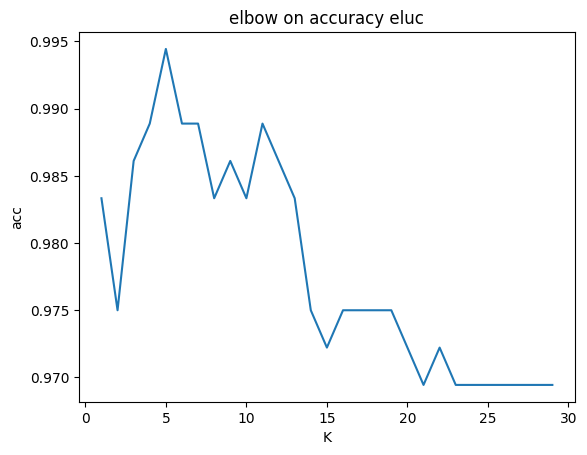

In [13]:
plt.title("elbow on accuracy eluc")
plt.ylabel("acc")
plt.xlabel("K")
plt.plot(x_index, acc_eluc)

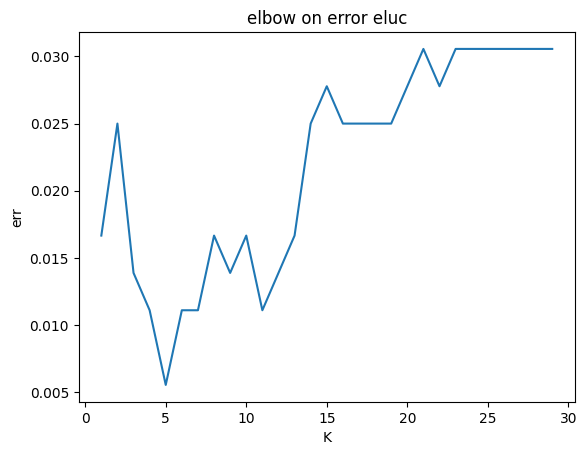

In [14]:
plt.title("elbow on error eluc")
plt.ylabel("err")
plt.xlabel("K")
plt.plot(x_index, errors)

In [15]:
max_index = np.argmax(np.array(acc_eluc)) + 1
print(f'best k is {max_index}')
print(f'best accuracy {acc_eluc[max_index]}')

best k is 5
best accuracy 0.9888888888888889


With cosine

In [18]:
x_index = []
acc_cosine = []
errors_cosine = []
for k in range(1, 30):
    if k % 5 == 0:
        print(f'progress {k / 30}')
    y_pred = []
    for i in range(len(X_test)):
        pred, _ = K_NN_estimator(k=k, X_train=X_train, y_train=y_train, distance_func=cosin_dist,
                                 input_vector=X_test[i])
        y_pred.append(pred)

    acc = accuracy_score(y_pred, y_test)
    acc_cosine.append(acc)
    x_index.append(k)
    errors_cosine.append(1-acc)



progress 0.16666666666666666
progress 0.3333333333333333
progress 0.5
progress 0.6666666666666666
progress 0.8333333333333334


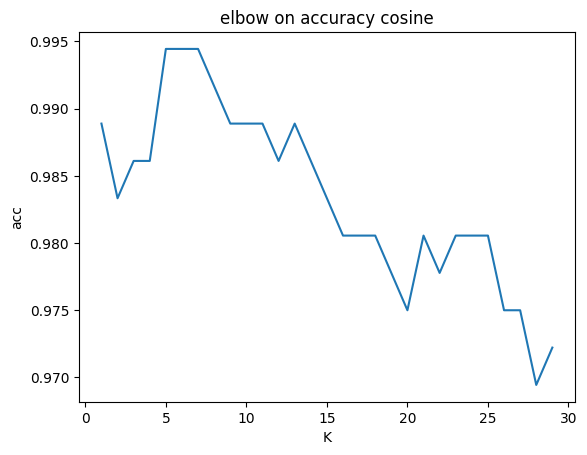

In [46]:
plt.title('elbow on accuracy cosine')
plt.ylabel("acc")
plt.xlabel("K")
plt.plot(x_index, acc_cosine)

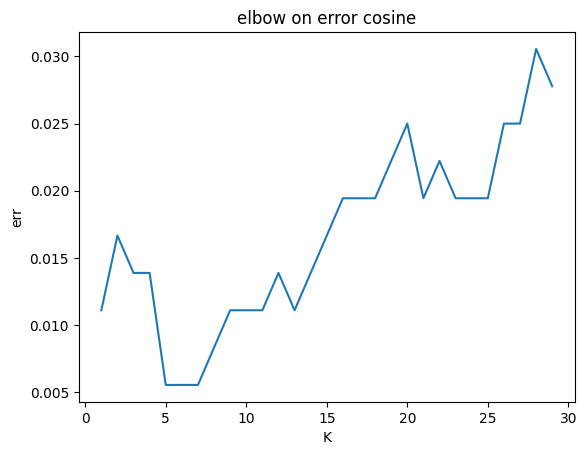

In [47]:
plt.title("elbow on error cosine")
plt.ylabel("err")
plt.xlabel("K")
plt.plot(x_index, errors_cosine)

In [21]:
max_index = np.argmax(np.array(acc_eluc)) + 1
print(f'best k is {max_index}')
print(f'best accuracy {acc_cosine[max_index]}')

best k is 5
best accuracy 0.9944444444444445


# e

eluc

In [22]:
test_length = len(y_test)
random_id = random.randint(1, test_length)
random_id

159

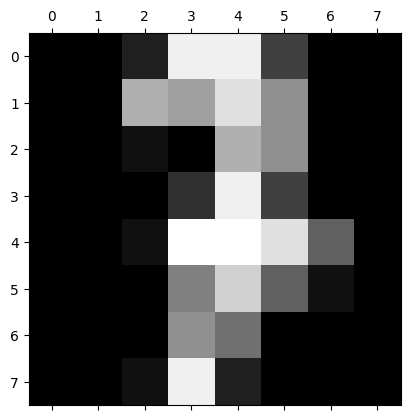

In [23]:
plt.matshow(np.reshape(X_test[random_id], (8, 8)))
img = digits.images[0]
plt.show()

In [24]:
pred, distances = K_NN_estimator(k=5, X_train=X_train, y_train=y_train, distance_func=elucidation_dist,
                                 input_vector=X_test[random_id])

pred, distances

(array([7]), [(56.0, 552), (75.0, 990), (86.0, 899), (88.0, 222), (90.0, 861)])

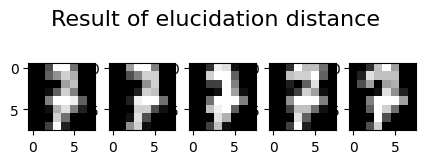

In [58]:
n_rows = 1
n_cols = 5

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5, 5))
fig.suptitle('Result of elucidation distance', fontsize=16)
fig.subplots_adjust(top=1.5)
for i in range(5):
    the_image_data = X_train[distances[i][1], :]
    the_image = np.reshape(the_image_data, (8, 8))
    ax[i].imshow(the_image)

cosine

In [26]:
pred, distances = K_NN_estimator(k=5, X_train=X_train, y_train=y_train, distance_func=cosin_dist,
                                 input_vector=X_test[random_id])

distances


[(0.02810535897832811, 552),
 (0.0560518732513543, 990),
 (0.05704901479288493, 861),
 (0.061800345715450566, 731),
 (0.06364027099504332, 264)]

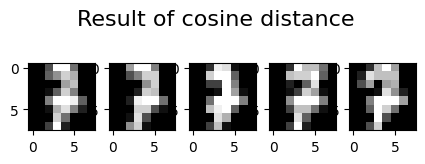

In [59]:
n_rows = 1
n_cols = 5

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5, 5))
fig.suptitle('Result of cosine distance', fontsize=16)
fig.subplots_adjust(top=1.5)
for i in range(5):
    the_image_data = X_train[distances[i][1], :]
    the_image = np.reshape(the_image_data, (8, 8))
    ax[i].imshow(the_image)

# f

In [28]:
def predict_all_tests(cost_function, k=5):
    preds = []
    for x in X_test:
        pred, distances = K_NN_estimator(k=k, X_train=X_train, y_train=y_train, distance_func=cost_function,
                                         input_vector=x)
        preds.append(pred[0])
    return preds


In [60]:
preds = np.array(predict_all_tests(elucidation_dist))
act_y = pd.Series(y_test, name='Correct')
pred_y = pd.Series(preds, name='Prediction')
eluc_confusion = pd.crosstab(act_y, pred_y)
print("Elucidation distance confusion")
eluc_confusion

Elucidation distance confusion


Prediction,0,1,2,3,4,5,6,7,8,9
Correct,,,,,,,,,,
0,34,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,35,0,0,0,0,0,0
4,0,0,0,0,31,0,0,0,0,0
5,0,0,0,0,0,38,0,0,0,1
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,37,0,0
8,0,0,0,0,0,0,0,0,32,0


In [61]:
preds = np.array(predict_all_tests(cosin_dist))
act_y = pd.Series(y_test, name='Correct')
pred_y = pd.Series(preds, name='Prediction')
cosine_confusion = pd.crosstab(act_y, pred_y)
print("Cosine distance confusion")
cosine_confusion

Cosine distance confusion


Prediction,0,1,2,3,4,5,6,7,8,9
Correct,,,,,,,,,,
0,34,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,35,0,0,0,0,0,0
4,0,0,0,0,31,0,0,0,0,0
5,0,0,0,0,0,38,0,0,0,1
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,37,0,0
8,0,0,0,0,0,0,0,0,32,0


# g

In [31]:
def TP_calc(confusion, id):
    return confusion[id][id]

In [32]:
def TN_calc(confusion, id, max_id=9):
    sum = 0
    for i in range(max_id):
        for j in range(max_id):
            if i==id or j == id:
                continue
            sum += confusion[id, i]
    return sum

In [33]:
def FP_calc(confusion,id ,max_id=9):
    sum = 0
    for i in range(max_id):
        if i == id:
            continue
        sum+= confusion[i][id]
    return sum

In [34]:
def FN_calc(confusion,id ,max_id=9):
    sum = 0
    for i in range(max_id):
        if id == i :
            continue
        sum+= confusion[id][i]
    return sum

In [35]:
def F1_score(confusion,id , max_id=9):
    TP = TP_calc(confusion,id)
    FP = FP_calc(confusion,id)
    FN = FN_calc(confusion,id)

    return TP/(TP + 0.5 * (FP+FN))

In [36]:
def give_all_info(confusion,id):
    TP = TP_calc(confusion,id)
    print(f'TP for {id} => {TP}')
    FP = FP_calc(confusion,id)
    print(f'FP for {id} => {FP}')
    FN = FN_calc(confusion,id)
    print(f'FN for {id} => {FN}')

    F1 = F1_score(confusion,id)
    print(f'F1_score for {id} => {F1}')

In [37]:
give_all_info(eluc_confusion,8)

TP for 8 => 32
FP for 8 => 0
FN for 8 => 0
F1_score for 8 => 1.0


In [38]:
give_all_info(eluc_confusion,3)

TP for 3 => 35
FP for 3 => 0
FN for 3 => 0
F1_score for 3 => 1.0


# h

In [39]:
give_all_info(cosine_confusion,6)

TP for 6 => 42
FP for 6 => 0
FN for 6 => 0
F1_score for 6 => 1.0


In [40]:
give_all_info(cosine_confusion,4)

TP for 4 => 31
FP for 4 => 0
FN for 4 => 0
F1_score for 4 => 1.0


In [41]:
give_all_info(cosine_confusion,9)

TP for 9 => 34
FP for 9 => 1
FN for 9 => 1
F1_score for 9 => 0.9714285714285714
